### Cargar librerías

In [3]:
import pandas     as      pd
import time
import os
import xlsxwriter
from   pathlib    import Path
import gurobipy   as     gp
from   gurobipy   import GRB
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

from openpyxl import Workbook

### Funcion a usar

#### Bloque superior

In [4]:
## Se crea una función que lo que hace, es determinar el bloque superior para cualquier bloque
def bloque_superior(i,limites_x_C,limites_y_C):
    a = limites_x_C[3] * limites_y_C[3] + i
    b = a - 1
    c = a + 1
    d = a - limites_x_C[3]
    e = a + limites_x_C[3]
    f = d - 1
    g = d + 1
    h = e - 1
    i = e + 1
    return [a,b,c,d,e,f,g,h,i]


def bloque_final (bloques_usados, limites_x_C, limites_y_C, limites_z_C):
    block_sup = []*len(bloques_usados)
    for i in bloques_usados:
        aux = []

        if i % (limites_x_C[3] * limites_y_C[3]) == 0:      # Type 1
            solution = bloque_superior(i,limites_x_C,limites_y_C)
            if solution[0]<=(limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[0])
            if solution[2]<=(limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[2])
            if solution[4] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                if solution[4]<=(limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                    aux.append(solution[4])

        elif i % (limites_x_C[3] * limites_y_C[3]) < limites_x_C[3] - 1:      # Type 2
            solution = bloque_superior(i,limites_x_C,limites_y_C)
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[0])
            if solution[1] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[1])
            if solution[2] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[2])
            if solution[4] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[4])

        elif i % (limites_x_C[3] * limites_y_C[3]) == limites_x_C[3] - 1:      # Type 3
            solution = bloque_superior(i,limites_x_C,limites_y_C)
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[0])
            if solution[1] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[1])
            if solution[4] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[4])

        elif i % (limites_x_C[3] * limites_y_C[3]) == (limites_x_C[3] * limites_y_C[3]) - 1:      # Type 9
            solution = bloque_superior(i,limites_x_C,limites_y_C)
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[0])
            if solution[1] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[1])
            if solution[3] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[3])

        elif i % (limites_x_C[3] * limites_y_C[3]) == limites_x_C[3] * (limites_y_C[3] - 1):      # Type 7
            solution = bloque_superior(i,limites_x_C,limites_y_C)
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[0])
            if solution[2] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[2])
            if solution[3] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[3])

        elif i % (limites_x_C[3] * limites_y_C[3]) > limites_x_C[3] * (limites_y_C[3] - 1) and i % (limites_x_C[3] * limites_y_C[3]) < (limites_y_C[3] * limites_x_C[3]) - 1:       # Type 8
            solution = bloque_superior(i,limites_x_C,limites_y_C)
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[0])
            if solution[1] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[1])
            if solution[2] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[2])
            if solution[3] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[3])

        elif (i % (limites_x_C[3]*limites_y_C[3]))%limites_x_C[3] == 0:      # Type 4
            solution = bloque_superior(i,limites_x_C,limites_y_C)
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[0])
            if solution[2] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[2])
            if solution[3] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[3])
            if solution[4] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[4])

        elif (i % limites_x_C[3])%limites_x_C[3] == limites_x_C[3]-1:      # Type 6
            solution = bloque_superior(i,limites_x_C,limites_y_C)
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[0])
            if solution[1] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[1])
            if solution[3] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[3])
            if solution[4] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[4])

        else:       # Type 5
            solution = bloque_superior(i,limites_x_C,limites_y_C)
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[0])
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[1])
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[2])
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[3])
            if solution[0] <= (limites_x_C[3] * limites_y_C[3] * limites_z_C[3] - 1):
                aux.append(solution[4])

        aux.sort()
        if aux == []:
            aux.append(i)
        block_sup.append(aux)
    return block_sup


#### Calculos globales

In [5]:
def t_cord(cord_):
    correct_ = []
    for i in cord_.values():
        if i not in correct_:
            correct_.append(i)
    size = correct_[1] - correct_[0]
    max_ = max(correct_)
    min_ = min(correct_)
    return (size, max_, min_, len(correct_))

def cantidad_bloques(alguna_variable, lista_exportar):
    for i in range(len(alguna_variable)):
        lista_exportar.append(i)


#### Función de Optimización

In [6]:
def FUNCION_MODELO_CIELO(bloques_CA,predecessor_block,
                             TON_C,MIN_C,REC_C,LEY_C,CM_CA_C,CP_CA_C,
                             t_C,RMu_t,RMl_t,RPu_t,RPl_t,qu_t,ql_t,time_max_C,
                             GAP,precio):
    
    import gurobipy   as     gp
    from   gurobipy   import GRB
    
    model_CA = gp.Model(name = 'Modelo Cielo Abierto')
    x_bt_OP = model_CA.addVars(t_C, bloques_CA, vtype=GRB.BINARY, name="x")
    Ton_Up  = model_CA.addConstrs((gp.quicksum(x_bt_OP[ti, b]*TON_C[b] for b in bloques_CA) 
                            <= RMu_t[ti] for ti in t_C), "Ton_max")
    Ton_low = model_CA.addConstrs((gp.quicksum(x_bt_OP[ti, b]*TON_C[b] for b in bloques_CA) 
                            >= RMl_t[ti] for ti in t_C), "Ton_min")
    Mat_Up_OP = model_CA.addConstrs((gp.quicksum(x_bt_OP[ti, b]*MIN_C[b] for b in bloques_CA) <= 
                           RPu_t[ti] for ti in t_C), "Mat_max")
    Mat_low_OP = model_CA.addConstrs((gp.quicksum(x_bt_OP[ti, b]*MIN_C[b] for b in bloques_CA) >= 
                            RPl_t[ti] for ti in t_C), "Mat_min")
    BLOCK_SUP_OP = model_CA.addConstrs((gp.quicksum(x_bt_OP[m, predecessor_block[l][0]]*(time_max_C-m+1) for m in t_C) <= 
                                 gp.quicksum(x_bt_OP[m, predecessor_block[l][1]]*(time_max_C-m+1) for m in t_C)  
                              for l in range(len(predecessor_block))), "Superior_Block")
    Reserve_cons_OP = model_CA.addConstrs((gp.quicksum(x_bt_OP[ti, b] for ti in t_C) <= 1 for b in bloques_CA), 
                           "Reserve_cons")
    GQC_Up_OP = model_CA.addConstrs((gp.quicksum(x_bt_OP[ti, b]*TON_C[b]*LEY_C[b] for b in bloques_CA) <=
                          qu_t[ti] * gp.quicksum(x_bt_OP[ti, b]*TON_C[b] for b in bloques_CA) for ti in t_C), 
                           "GQC_Up")

    GQC_low_OP = model_CA.addConstrs((gp.quicksum(x_bt_OP[ti, b]*TON_C[b]*LEY_C[b] for b in bloques_CA) >=
                          ql_t[ti] * gp.quicksum(x_bt_OP[ti, b]*TON_C[b] for b in bloques_CA) for ti in t_C), 
                           "GQC_LOW")
    
    FO_OP = gp.quicksum(x_bt_OP[ti, b]*((((0.7*precio*LEY_C[b]-CP_CA_C[b])*MIN_C[b])-(CM_CA_C[b]*TON_C[b]))/((1+0.1)**t_C[ti]))
                 for ti in t_C for b in bloques_CA)
    
    model_CA.setObjective(FO_OP, GRB.MAXIMIZE)
    ## Momentaneo
    model_CA.Params.TimeLimit = 1000
    #model_CA.Params.MIPGap = 0.20
    model_CA.Params.MIPGap = GAP    
    model_CA.optimize()
    lista_variable_CA = model_CA.getAttr(GRB.Attr.X)

    solucion = model_CA.objVal    
    return solucion, lista_variable_CA

### Función generada para la visualización de modelo, No importante

In [7]:
def Separador_Variable_CA (LISTA_VARIABLE_X, bloques_CA):
    j = 0
    blocks_year =[]
    aux_year = []
    for i in LISTA_VARIABLE_X:
        if i == 1:
            a = j//len(bloques_CA)+1
            b = j%len(bloques_CA)
            aux_year.append(int(b))
        if (j+1)%len(bloques_CA) == 0:
            aux_year.sort(reverse = True)
            blocks_year.append(aux_year)
            aux_year=[]
        j += 1
    return blocks_year

def posicionar_bloque_CA(bloque,limites_x_C,limites_y_C,limites_z_C):
    
    # Bloque corresponde al número de este, ejemplo bloque 0 -> x: 0 | y: 0 | z: 0
    # Es importante notar la importancia de la cantidad de bloques en los ejes; bloques_x = 10 | bloques_y = 10 | bloques_z = 10
    # Bloque 56 -> z: Bloque//(bloques_x*bloques_y)                                    -> z: 0  -> aux_z = 0
    #           -> y: (Bloque - (aux_z*(bloques_x*bloques_y)  ))//(bloques_x)          -> y: 5  -> aux_y = 5
    #           -> x: (Bloque - (aux_z*(bloques_x*bloques_y)  ) - (aux_y*bloques_x))   -> x: 6  -> aux_x = 6
    # Ejemplo 2:
    # Bloque 108 -> z: Bloque//(bloques_x*bloques_y)                                    -> z: 1  -> aux_z = 1
    #            -> y: (Bloque - (aux_z*(bloques_x*bloques_y)  ))//(bloques_x)          -> y: 0  -> aux_y = 0
    #            -> x: (Bloque - (aux_z*(bloques_x*bloques_y)  ) - (aux_y*bloques_x))   -> x: 8  -> aux_x = 8
    
    aux_z = bloque//(limites_x_C[3]*limites_y_C[3])
    aux_y = (bloque - aux_z * (limites_x_C[3]*limites_y_C[3]))//limites_x_C[3]
    aux_x = (bloque - aux_z * (limites_x_C[3]*limites_y_C[3])- aux_y * limites_x_C[3])
    
    # Aquí no se escala
    posicion = [aux_x ,aux_y ,aux_z]
    # Se va a escalar
    #posicion = [aux_x - distancia_rebloq[0],aux_y - distancia_rebloq[1],aux_z - (distancia_rebloq[2]/limites_z[0])]
    
    return posicion

def posicion_lista_CA(lista_variable_X_separada,limites_x_C,limites_y_C,limites_z_C,limites_x,limites_y,limites_z,distancia_rebloq,rebloqueo_x,rebloqueo_y,rebloqueo_z):
    lista_final = list()
    for t in lista_variable_X_separada:
        lista_aux = list()
        for bloque in t:
            posicion = posicionar_bloque_CA(bloque,limites_x_C,limites_y_C,limites_z_C)
            
            # posición es de la forma [x,y,z], por lo mismo se aprovechará de des_Rebloquear acá
            for x in range(rebloqueo_x):
                for y in range(rebloqueo_y):
                    for z in range(rebloqueo_z):
                        
                        # Tambien se aprovechará de escalar
                        valor_x = posicion[0]*rebloqueo_x + x - (distancia_rebloq[0]//limites_x[0])
                        valor_y = posicion[1]*rebloqueo_y + y - (distancia_rebloq[1]//limites_y[0])
                        valor_z = posicion[2]*rebloqueo_z + z - (distancia_rebloq[2]//limites_z[0])
                        
                        coordenada_final = [valor_x,valor_y,valor_z]
                        
                        lista_aux.append(coordenada_final)
        lista_final.append(lista_aux)
    return lista_final

def matriz_ca_x (bloques_final, lista_final):
    matriz = []
    for x in range(bloques_final[0] + 1):
        filas_matriz = []
        for y in range(bloques_final[1] + 1):
            columna_matriz = []
            for z in range(bloques_final[2] + 1):
                x = 0
                columna_matriz.append(x)
            filas_matriz.append(columna_matriz)
        matriz.append(filas_matriz)
        
    for bloque in lista_final:
        matriz[bloque[0]][bloque[1]][bloque[2]] = 1
        
    return matriz

### Cargar Archivos

In [8]:
## Se debe seleccionar la ruta del archivo, con su nombre y extensión
data_folder = Path('C:/Users/Desktop/WILLIAMS/CIELO')

Excel_Rebloqueado = 'Modelo.xlsx'

df_C = pd.read_excel(data_folder/Excel_Rebloqueado, engine="openpyxl")


## Base de datos del modelo subterráneo
cord_x_C = df_C['X'].to_dict()
cord_y_C = df_C['Y'].to_dict()
cord_z_C = df_C['Z'].to_dict()
TON_C = df_C['Ton'].to_dict()
MIN_C = df_C['Mineral'].to_dict()
REC_C = df_C['Recuperación'] .to_dict()
LEY_C = df_C['%Cu'].to_dict()
CM_CA_C = df_C['CMina CA'].to_dict()
CP_CA_C = df_C['CPlanta CA'].to_dict()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\iaort\\Desktop\\WILLIAMS\\CIELO\\Modelo.xlsx'

### Calcular límites del modelo

In [9]:
limites_x_C = t_cord(cord_x_C)
limites_y_C = t_cord(cord_y_C)
limites_z_C = t_cord(cord_z_C)

bloques_CA = list()

cantidad_bloques(cord_x_C, bloques_CA)

bloques_usados = bloques_CA.copy()
block_sup = bloque_final(bloques_usados, limites_x_C, limites_y_C, limites_z_C)

predecessor_block = []
for i in range(len(bloques_usados)):
    for j in block_sup[i]:
        aux_1 = []
        aux_1.append(bloques_usados[i])
        aux_1.append(j)
        predecessor_block.append(aux_1)

def b_sup_init():
    return (i for i in range(len(predecessor_block)))

NameError: name 'cord_x_C' is not defined

### Parámetros a evaluar de cada modelo

In [10]:
### Escenario en un solo periodo, limitando a extraer lo máximo solo queriendo sacar el máximo beneficio y conocer sus ton
t_C_2 = {0:1}
RMu_t_2 = {0:999999999999}
RMl_t_2 = {0:0}
RPu_t_2 = {0:999999999999}
RPl_t_2 = {0:0}
qu_t_2 = {0:3}
ql_t_2 = {0:0}
time_max_C_2 = t_C_2[max(t_C_2)]

E1 = [t_C_2,RMu_t_2,RMl_t_2,RPu_t_2,RPl_t_2,qu_t_2,ql_t_2,time_max_C_2]


### Use un precio random para que calce con las leyes del modelo creado
precio = [1500000.912]

valor, lista_resultado = FUNCION_MODELO_CIELO(bloques_CA,predecessor_block,
                             TON_C,MIN_C,REC_C,LEY_C,CM_CA_C,CP_CA_C,
                             E1[0],E1[1],E1[2],E1[3],E1[4],E1[5],E1[6],E1[7],
                             0.1,precio[0])

NameError: name 'bloques_CA' is not defined

#### se sacará un valor aproximado del tonelaje

In [23]:
ton = 0
Min = 0
for i in range(len(lista_resultado)):
    ton += lista_resultado[i]*TON_C[i]
    Min += lista_resultado[i]*MIN_C[i]
    
print(ton)
print(Min)

21227400.0
175606.8217726841


#### Se verá el calculo para los tonelajes y materiales sacados anteriormente

se debe destacar que se dejará abierto las leyes por periodo, y se considerarán 4 periodos y se les dará holgura a estos rangos

In [26]:
t_C_3 = {0:1, 1:2, 2:3, 3:4}
RMu_t_3 = {0:ton*1.2/4, 1:ton*1.2/4, 2:ton*1.2/4, 3:ton*1.2/4}
RMl_t_3 = {0:ton*0.8/4, 1:ton*0.8/4, 2:ton*0.8/4, 3:ton*0.8/4}
RPu_t_3 = {0:Min*1.2/4, 1:Min*1.2/4, 2:Min*1.2/4, 3:Min*1.2/4}
RPl_t_3 = {0:Min*0.8/4, 1:Min*0.8/4, 2:Min*0.8/4, 3:Min*0.8/4}
qu_t_3 = {0:3, 1:3, 2:3, 3:3}
ql_t_3 = {0:0, 1:0, 2:0, 3:0}
time_max_C_3 = t_C_3[max(t_C_3)]


E2 = [t_C_3,RMu_t_3,RMl_t_3,RPu_t_3,RPl_t_3,qu_t_3,ql_t_3,time_max_C_3]

precio = [1500000.912]

valor_g, lista_resultado_g = FUNCION_MODELO_CIELO(bloques_CA,predecessor_block,
                             TON_C,MIN_C,REC_C,LEY_C,CM_CA_C,CP_CA_C,
                             E2[0],E2[1],E2[2],E2[3],E2[4],E2[5],E2[6],E2[7],
                             0.1,precio[0])

Changed value of parameter TimeLimit to 1000.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 44904 rows, 32000 columns and 515828 nonzeros
Model fingerprint: 0x61fedf46
Variable types: 0 continuous, 32000 integer (32000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+03]
  Objective range  [2e+01, 1e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+06]
Presolve removed 408 rows and 0 columns
Presolve time: 0.79s
Presolved: 44496 rows, 32000 columns, 451832 nonzeros
Variable types: 0 continuous, 32000 integer (32000 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   49356    7

## Visualizando los resultados
#### Modelo Global

In [38]:
lista_x_CA_separada = Separador_Variable_CA(lista_resultado_g,bloques_CA)

limites_x = limites_x_C
limites_y = limites_y_C
limites_z = limites_z_C
distancia_rebloq = [0,0,0]
rebloqueo_x = 1
rebloqueo_y = 1
rebloqueo_z = 1

## De las variables separadas, les calcula las coordenadas del bloque asociado a la variable, lo escala y des-rebloquea
coordenadas_X_CA = posicion_lista_CA(lista_x_CA_separada,limites_x_C,limites_y_C,limites_x,limites_y,limites_z_C,limites_z,
                                     distancia_rebloq,rebloqueo_x,rebloqueo_y,rebloqueo_z)

## Finalmente se debe pasar esto a la matriz
M_F = list()
for i in coordenadas_X_CA:
    lista_f = matriz_ca_x([20,20,20], i)
    M_F.append(np.array(lista_f))

In [39]:
COLORES = ['#380282',       # Morado
            '#0165fc',      # Azul
            '#a2cffe',      # Celeste
            '#3f9b0b',      # Verde
            '#fffd01',      # Amarillo
            '#ff5b00',      # Naranjo
            '#7b002c',      # Rojo
            '#000000'       # Negro
          ]

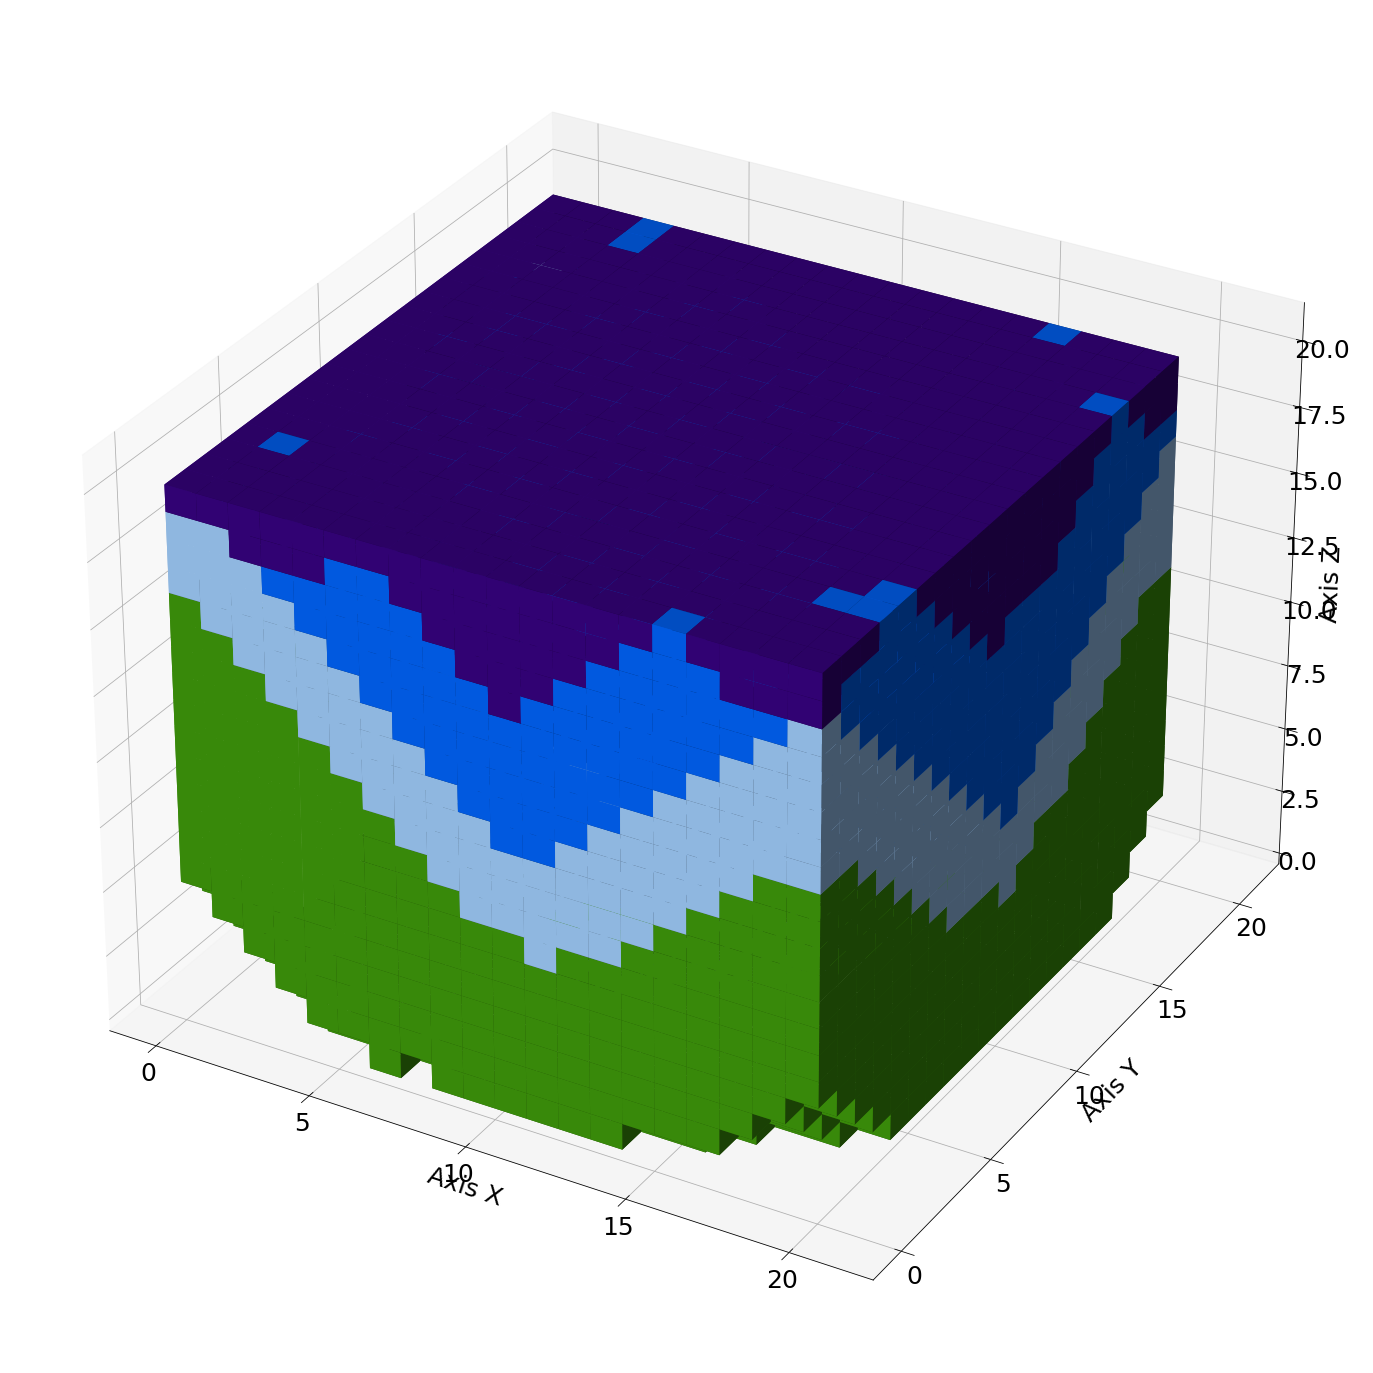

In [43]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

ax.set_xlabel('Axis X',fontsize= 25)
ax.set_ylabel('Axis Y',fontsize= 25)
ax.set_zlabel('Axis Z',fontsize= 25)
ax.zaxis.set_tick_params(labelsize = 25)
ax.xaxis.set_tick_params(labelsize = 25)
ax.yaxis.set_tick_params(labelsize = 25)
aux = 0
for i in M_F:
    ax.voxels(i , facecolors = COLORES[aux]  , edgecolor="none", alpha = 1)
    aux += 1
plt.show()

In [44]:
## Van modelo 4 periodos
valor_g

1267037132.3785875

In [49]:
lista_x_CA_separada = Separador_Variable_CA(lista_resultado,bloques_CA)

limites_x = limites_x_C
limites_y = limites_y_C
limites_z = limites_z_C
distancia_rebloq = [0,0,0]
rebloqueo_x = 1
rebloqueo_y = 1
rebloqueo_z = 1

## De las variables separadas, les calcula las coordenadas del bloque asociado a la variable, lo escala y des-rebloquea
coordenadas_X_CA = posicion_lista_CA(lista_x_CA_separada,limites_x_C,limites_y_C,limites_x,limites_y,limites_z_C,limites_z,
                                     distancia_rebloq,rebloqueo_x,rebloqueo_y,rebloqueo_z)

## Finalmente se debe pasar esto a la matriz
M_F = list()
for i in coordenadas_X_CA:
    lista_f = matriz_ca_x([20,20,20], i)
    M_F.append(np.array(lista_f))

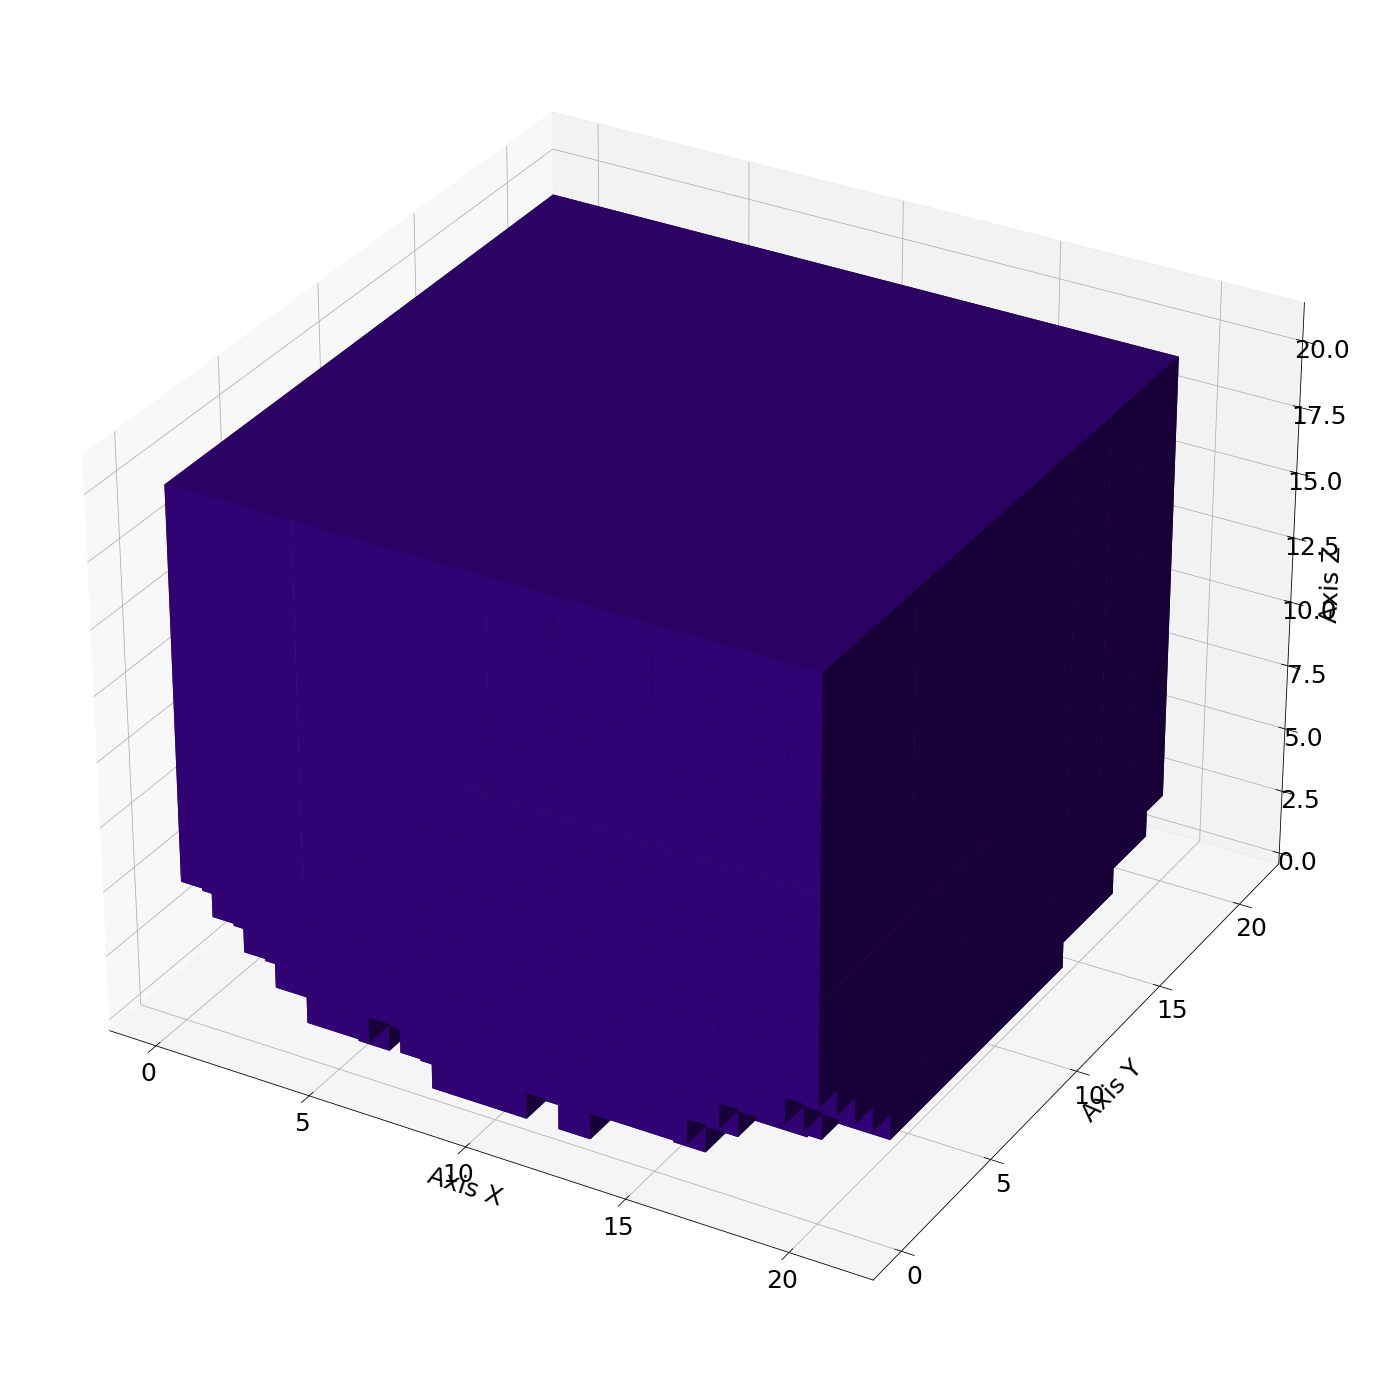

In [50]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

ax.set_xlabel('Axis X',fontsize= 25)
ax.set_ylabel('Axis Y',fontsize= 25)
ax.set_zlabel('Axis Z',fontsize= 25)
ax.zaxis.set_tick_params(labelsize = 25)
ax.xaxis.set_tick_params(labelsize = 25)
ax.yaxis.set_tick_params(labelsize = 25)
aux = 0
for i in M_F:
    ax.voxels(i , facecolors = COLORES[aux]  , edgecolor="none", alpha = 1)
    aux += 1
plt.show()

In [51]:
valor

1398208435.2084353

In [52]:
valor_g/valor

0.9061861597120935